%%latex
In a previous article we looked at graphical methods of normality testing. We looked at how to plot histograms and QQ plots. We also looked how to compare data from other distributions to a normal distribution. While graphical tests are one approach to test for normality in data, another approach is to use statistical tests to check for normality. Statistical tests provide a quantitative picture compared to graphical tests however factors like the sample size and large deviations in the data set can yield wrong results hence care must be taken while interpreting statistical tests. 

In this notebook we are going to cover the following statistical tests: 

1) Shapiro Wilks test

2) Anderson Darling test

3) Lilliefors test 


While there are many other test for normality, we are going to focus on these 3 as simple examples of how normality tests can be conducted. We pick these test based on their power. Statistical power is the probability of a test to make type 2 errors. The higher the probability that it will make type 2 errors, the less power the test has. In our selection the Shapiro-Wilks test has the highest power, followed by the Anderson Darling and Lilliefors test.




## 1) Shapiro Wilks test

The Shapiro Wilks test for normality is considered a powerful test for normality. For a dataset values given by
$ \mathbf{x} = (x_1,x_2, x_3 ... x_N) $, we have the following test statistic: 

$$ W  =  \dfrac{\big(\sum_{i=1}^{N} a_i {x^{`}}_i\big)^2}{\sum_{i=1}^{N}(x_i - \bar x)^2}  $$  


where $ x^{`}$  are ordered statistics, meaning we arrange the values in  $\bf x$  from lowest to highest<br>

$ a_i$'s are coefficient which we determine from the covariance matrix and expected value of order statistics. You can learn more about it here [[1]](http://www.math.utah.edu/~morris/Courses/ShapiroWilk.pdf).

$\bar x$ is the mean of all the $\bf x$ values 

Thankfully we do not have to compute the test statistic directly, python has a package for running the Shapiro-Wilks test. 

Let us generate 100 samples from a normal distribution to for this and other tests. 


In [1]:
# all imports
import numpy as np 
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd 

import plotly.graph_objs as go
import plotly_express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import scipy.stats as sps

init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston


In [2]:
# generating a random sample of size 100 in numpy 

# set seed so the same set of random numbers are generated 
np.random.seed(1)

# sample 100 values from a normal distribution 
normal_sample = np.random.randn(100)  

# running the shapiro wilks test
print(stats.shapiro(normal_sample)) 


(0.9920045137405396, 0.8215526342391968)


The Shaprio-Wilks test is a package in scipy which outputs 2 values. W which is the test statistic and the p-value of the test. The test statistic W  is close to 1 if the data approximates a normal distribution and is 0 otherwise. 

The null all the alternate hypothesis for test are: 

* H0: The sample was drawn from a normal distribution <br>
    if p-value > significance level
    

* H1: Unable to conclude that the sample was drawn from a normal distribution  <br>
    if p-value < significance level 
    
In the above example, the p-value is greater than the significance level, hence the null hypothesis should be accepted saying that data comes from a normal distribution.  
    
There are certain limitation to keep in mind when using the Shapiro-Wilks test: 

1) Shapiro Wilks test is known to work well for small datasets. A note about the scipy implementation states it can be used for samples upto 5000. Above that while the W statistic is accurate the p-value may not.[[2]](https://github.com/scipy/scipy/blob/v1.3.3/scipy/stats/morestats.py#L1593-L1662) 

2) It does not do well when you have repeated values in your dataset. 


## 2) The Anderson-Darling test 
 The Anderson-Darling test uses the "distance" between cumulative distribution of the data set and the cumulative distribution of a normal distribution. For a given data set $\bf X$, the test statistic for the Anderson-Darling test is: 
 
 $$A^2  = - N- \sum_{i=1}^{N} \dfrac{2i-1}{N} [ln(F(X_i))+ ln(1-F(X_{N+1-i}))] $$
 
 where $F$ is the specified distribution. Meaning F is the distribution with which the data is being compared. In case of a normality test, this is the normal distribution hence $F$ will be the normal distribution.

N is the total number of data points in the dataset. Note that the $\bf X$ values have to be ordered. 

Scipy has an implementation of the Anderson Darling test but unlike Shapiro Wilks the Anderson-Darling test outputs the test statistic and a set significance levels and their corresponding critical values. Look at the code below to see the output.  


In [3]:
# running the anderson darling test on the same sample as the Shapiro-Wilks test
print(stats.anderson(normal_sample))

AndersonResult(statistic=0.2196508855594459, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


The test statistic is 0.21 and the critical values for the significance level of 15%, 10%, 5%, 2.5%  and 1% are given. The null and the alternate hypothesis for normality are given as: 

* H0: The sample was drawn from a normal distribution <br> 
    if  $A^2$ < chosen critical value 

* H1:  Unable to conclude that the sample was drawn from a normal distribution  <br>
   if  $A^2$ > chosen critical value
   
   
Looking at the test statistic of 0.2196 the conclusion would be that the comes from a normal distribution since the test statistic is smaller than all the critical values


The main limitation of the Anderson Darling test is that it does not have the same power as Shapiro-Wilks test.


## 3) Lilliefors test

Both the Lilliefors test and Anderson Darling tests are a modification to another popular test of normality called the Kolomogorov-Smirnov (KS) test. The Lilliefors test is a little more closely related to the KS test since the test statistic is almost the same as KS test. The following steps have to be followed to conduct the Lilliefors: 

1) Convert you data to z-scores. To do that calculate the mean and standard deviation and for each x value do- 
    
$$ z = \frac{x - \bar x}{s} $$
    
where $\bar x$ is the mean value of the dataset $\mathbf x$ 
$s$ is the standard deviation of the dataset 
    
2) Convert the z scores to an empirical cumulative distribution 
3) To calculate the test statistic, first the absolute value of the difference between the empirical cumulative distribution and the cumulative distribution from a standard normal is taken. 

$$  \text{D} =  ( \text{ECDF}(z_i) - \text{CDF}(z_i) ) $$ 

4) D will not be a single number but an array of numbers the size of the dataset. Once D is calculated then test statistic is defined as: 

$$  \text{T} = \text{max(D)} $$

The null and the alternate hypothesis can be defined as: 

* H0: The empirical distribution is normal
        if T < critical value 

* H1: Unable to conclude that the empirical distribution is normal 
        if T > critical value 
        
The critical value comes from tables such as these [[3]](http://www.real-statistics.com/statistics-tables/Lilliefors-test-table/). Since the table data is limited and calculating critical values would be challenging each time, python provides P-values for the Lilliefors test. Hence the null hypothesis is accepted if the p-value is greater than a significance level or rejected if it is less than the significance level. 

Below is the code on how to run a Lilliefors test in Python



In [4]:
# import Lilliefors test from Stats model 
from statsmodels.stats import diagnostic

print(diagnostic.lilliefors(normal_sample))


(0.04330972976650932, 0.2)


The first value in the print statement is the Lilliefors test statistic and the second value is the p-value. If we select a significance level of 0.05 then since the p-value is larger than the significance level, the null hypothesis is accepted concluding that the data comes from a normal distribution.

The Lilliefors test is the weakest of all the tests that have been discussed so far. 

## Practical application of normality tests 

So far we have seen three statistical tests and how to implement them in python. We have also seen graphical methods of identifying normality in this [previous article](https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543). A useful exercise would be to take some real data see how well these methods hold up.

Let us look at three different datasets and try to identify if the data is normal or not.

The three examples will be: <br>

1) Distribution of SAT writing scores <br>
2) A contrived linear regression example <br> 
3) Linear regression on a real dataset<br>




###  1) Distribution of SAT writing scores
  
  Our first example is are the average SAT scores by school for California (You can find the dataset [here](https://data.world/education/california-sat-report-2015-2016/workspace/file?filename=SAT+Report+2015-2016.xls)). The first step is to import the data. Then visualize it with a histogram and QQ plot. Following this all three statistical tests will be applied to the data to check for normality. 
  
  Starting out by importing the data. 
  


In [5]:
## visualizing a histogram

# import data from excel file
sat_scores_data = pd.read_excel("SAT__2015_2016.xls")

# drop nans and cleaning the data, converting strings to numeric values
write_score = sat_scores_data["AvgScrWrit"].dropna()
write_score_cleaned = write_score[write_score!="*"]
write_score_cleaned = pd.to_numeric(write_score_cleaned)



# callback function for the slider
def change_bins(number_bins):

    # plotly express histogram 
    return px.histogram(write_score_cleaned.to_frame(name="avgscrwrite"), x="avgscrwrite", nbins=int(number_bins), title="Figure 1")


slider_obj =  widgets.FloatSlider(value=10, min=10, max=100,step=5, description="Num of bins", continuous_update=False)
interact(change_bins, number_bins=slider_obj);

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Num of bins', min=10.0, st…

A visual inspection of the histogram may lead one to naively conclude that the dataset is approximately normal. To further explore, let us see the results of a qq plot. We can use the statsmodels to quickly plot qq plots as shown below.




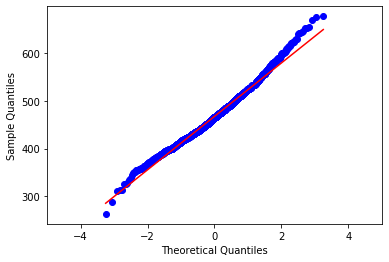

In [6]:
fig = sm.qqplot(write_score_cleaned.values, sps.distributions.norm, loc=0, scale=1, line="q")
plt.xlim([-5,5])
plt.show()

The sample quantile values (the blue points) should fall along the red line to conclude that the data is sampled from a normal distribution. However, while some points in the center fall on  the red line, most do not. It may be prudent to conclude that the data does not come from a normal distribution. 

From the histogram it seems that the data is approximately normal with outliers, with the qq plot the data does not seem to come from a normal distribution. The inform our decision better, the statistical tests can be brought in. Applying at three statistical tests, we get: 


In [7]:
print("Shaprio-Wilks test results \n {} \n".format(stats.shapiro(write_score_cleaned.values)))
print("Anderson-Darling test results \n {} \n".format(stats.anderson(write_score_cleaned.values)))
print("Lilliefors test results \n {} \n" .format(diagnostic.lilliefors(write_score_cleaned.values)))

Shaprio-Wilks test results 
 (0.9895123243331909, 7.451100292321655e-10) 

Anderson-Darling test results 
 AndersonResult(statistic=4.484630057395634, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Lilliefors test results 
 (0.035721183196377126, 2.3509445434886582e-05) 



The Shapiro-Wilks test yields an extremely small p-value which is less than 0.5 hence the null hypothesis must be rejected. In the Anderson-Darling test the test statistic is large compared to the larger significance level value which means the null hypothesis has to be rejected, and finally in case of the Lilliefros test the p-value is extremely small as well meaning that the null hypothesis must be rejected.

Here is a summary of the conclusions:

1) Histogram: Looks approximately normal <br>
2) qq plot:  Points do not fall on line, hence possibly non-normal <br>
3) Shapiro-Wilks test: Reject Null hypothesis <br>
4) Anderson-Darling test: Reject Null hypothesis <br>
5) Lilliefors Test: Reject Null hypothesis <br>


Looking at these conclusions it is safe to conclude that the data does not come from a normal distribution. Although the histogram looked approximately normal, the qq plot does not reflect normality and all the tests fail to conclude that comes from a normal distribution.



A similar exercise for the average reading score column.



In [8]:
# drop nans and cleaning the data, converting strings to numeric values
reading_score = sat_scores_data["AvgScrRead"].dropna()
reading_score_cleaned = reading_score[reading_score!="*"]
reading_score_cleaned = pd.to_numeric(reading_score_cleaned)



# callback function for the slider
def change_bins(number_bins):

    # plotly express histogram 
    return px.histogram(reading_score_cleaned.to_frame(name="avgscrread"), x="avgscrread", nbins=int(number_bins), title="Figure 2")


slider_obj =  widgets.FloatSlider(value=10, min=10, max=100,step=5, description="Num of bins", continuous_update=False)
interact(change_bins, number_bins=slider_obj);

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Num of bins', min=10.0, st…

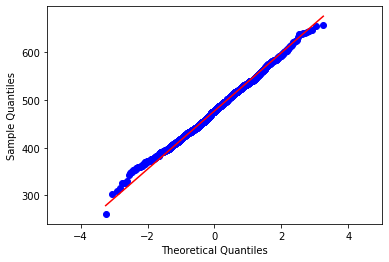

In [9]:
fig = sm.qqplot(reading_score_cleaned.values, sps.distributions.norm, loc=0, scale=1, line="q")
plt.xlim([-5,5])
plt.show()

In [10]:
print("Shaprio-Wilks test results \n {} \n".format(stats.shapiro(reading_score_cleaned.values)))
print("Anderson-Darling test results \n {} \n".format(stats.anderson(reading_score_cleaned.values)))
print("Lilliefors test results \n {} \n" .format(diagnostic.lilliefors(reading_score_cleaned.values)))

Shaprio-Wilks test results 
 (0.9971808195114136, 0.0032507781870663166) 

Anderson-Darling test results 
 AndersonResult(statistic=1.4242905310893548, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Lilliefors test results 
 (0.03278969135383619, 0.0001748972130617324) 



At 10 bins, the histogram seems to have a shape of a normal distribution, however as the the number of bins are changed a lot of smaller peaks emerge in the data. In the qq plot, it seems like majority of the points do fall on the line. However, along the edges there is deviation from the red line.
 
Similar to the previous case, all the statistical tests fail to conclude if the distribution is normal or not. However the magnitude of the p-value is far larger compared to the last example. Looking at the results of the qq plot and the statistical tests one can conclude that the dataset may be approximately normal. 

Both the examples above demonstrate how much ambiguity is in this type of testing. There might be situations where looking at the histogram the data may seem normal but conducting statistical tests and plotting qq plots can aid in a deeper understanding of the data. 


### Linear regression on a contrived dataset

In this example, a dataset will be generated for linear regression and after a model is fit to it the residuals will be acquired, following this we will as the question, do the residuals follow a normal distribution or not? 

The first code block is to generate and plot data from linear regression. 

In [11]:
np.random.seed(1)

# generating x values will values for noise and setting the slope and y intercept 
x = np.arange(0,1000)
noise = np.random.normal(0,5,1000)
slope = 0.1
b = 5.0 

# generating the range of the data
y = (slope*x)+b 
y_noised =  y+noise

# converting data to data frame and plotting in plot express
data = {'x':x, 'y_noised':y_noised} 
lr_data = pd.DataFrame(data)
px.scatter(lr_data, x='x', y='y_noised')

# getting a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y_noised, test_size=0.2, random_state=1)


# reshaping arrays for fitting
x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)

x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)


# fitting the model in sklearn 
lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

# getting the slope and y intercept of the model line 
pred_slope = lr.coef_
pred_b = lr.intercept_

# generating data for the model line 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
model_line_df = pd.DataFrame({'x':x, 'y':model_line_reshaped})



# generate mean squared error and plot it 
y_pred= lr.predict(x_test_reshaped)
residuals = y_test - y_pred.reshape(y_pred.shape[0],)


# plotting the original data with the model line and the residuals

subplots = make_subplots(rows=1, cols=2)

subplots.add_trace(go.Scatter(x=lr_data['x'], y=lr_data['y_noised'], mode='markers', name='noised data'), row=1, col=1)
subplots.add_trace(go.Scatter(x=model_line_df['x'], y=model_line_df['y'], name='model line', line={'width':4, 'color':'orange'}), row=1, col=1)
subplots.add_trace(go.Histogram(x=residuals,name='distribution of residuals',nbinsx=30, histnorm='probability'), row=1, col=2 )


The goal now is to check using qq plot and statistical tests if the distribution of residuals follows a normal distribution or not. First checking using the qq plot. 


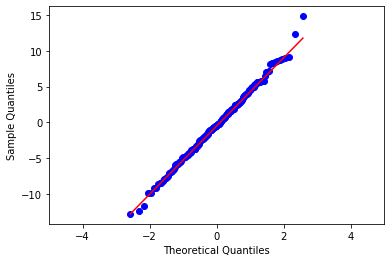

In [12]:
# qq plot for distribution of residuals
fig = sm.qqplot(residuals, sps.distributions.norm, loc=0, scale=1, line="q")
plt.xlim([-5,5])
plt.show()

Running the statistical tests

In [13]:
print("Shaprio-Wilks test results \n {} \n".format(stats.shapiro(residuals)))
print("Anderson-Darling test results \n {} \n".format(stats.anderson(residuals)))
print("Lilliefors test results \n {} \n" .format(diagnostic.lilliefors(residuals)))

Shaprio-Wilks test results 
 (0.997173011302948, 0.9765081405639648) 

Anderson-Darling test results 
 AndersonResult(statistic=0.11187827303507447, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Lilliefors test results 
 (0.023945552173576967, 0.2) 



Most of the points lie on the red line in the qq plot meaning that the distribution of residuals may be a normal distribution. In case of the statistical tests. All of them suggest that the null hypothesis should be accepted. The Shapiro-Wilks tests has a p-value of 0.97 well above the 0.05 threshold to accept the null hypothesis. Same logic applies to the Lilliefors test. In the Anderson Darling test case, the test statistic is lower that for 15% significance level which mean that the null hypothesis must be accepted.

This example is an idealization since the noise was drawn from a normal distribution and hence the residuals ideally would have a normal distribution. A more illuminating example would be to take a real dataset and perform linear regression and check if the residuals are normal. That is the next example. 

### Linear regression on a real dataset 

This example involves checking if the residuals of a real dataset follow a normal distribution. Linear regression is done on one of the columns of the Boston housing dataset. Since we wanted to be able to display the results on a 2d plot, only 1 column was chosen. 

The Boston housing dataset is a dataset consists of data on 506 neighborhoods of Boston with 14 features for each neighborhood. It has a mix of continuous and categorical variables. 

We run linear regression data where the x-value is the proportion of owner occupied units and the y value is the median value of homes in the neighborhood

In [14]:
# get the boston housing dataset
boston_dataset = load_boston()
target = boston_dataset.target
boston_data = boston_dataset.data

In [29]:
y = boston_data[:,-1] 
x = boston_data[:,6] 
lr_data = {'x':x, 'y':y}
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)


# reshaping arrays for fitting
x_train_shape = x_train.shape[0]
y_train_shape = y_train.shape[0]

x_train_reshaped = x_train.reshape(x_train_shape, 1)
y_train_reshaped = y_train.reshape(y_train_shape, 1)

x_test_shape = x_test.shape[0]
x_test_reshaped = x_test.reshape(x_test_shape, 1)


# fitting the model in sklearn 
lr = LinearRegression()
lr.fit(x_train_reshaped, y_train_reshaped)

# getting the slope and y intercept of the model line 
pred_slope = lr.coef_
pred_b = lr.intercept_

# generating data for the model line 
model_line = (pred_slope*x)+pred_b
model_line_reshaped = model_line.reshape(model_line.shape[1])
model_line_df = pd.DataFrame({'x':x, 'y':model_line_reshaped})


# generate mean squared error and plot it 
y_pred= lr.predict(x_test_reshaped)
residuals = y_test - y_pred.reshape(y_pred.shape[0],)


# plotting the original data with the model line and the residuals

subplots = make_subplots(rows=1, cols=2)

subplots.add_trace(go.Scatter(x=lr_data['x'], y=lr_data['y'], mode='markers', name='noised data'), row=1, col=1)
subplots.add_trace(go.Scatter(x=model_line_df['x'], y=model_line_df['y'], name='model line', line={'width':4, 'color':'orange'}), row=1, col=1)
subplots.add_trace(go.Histogram(x=residuals,name='distribution of residuals',nbinsx=30, histnorm='probability'), row=1, col=2 )
subplots.show()

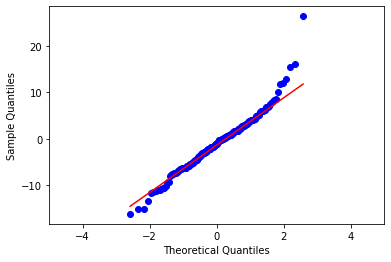

In [30]:
# qq plot for distribution of residuals
fig = sm.qqplot(residuals, sps.distributions.norm, loc=0, scale=1, line="q")
plt.xlim([-5,5])
plt.show()

In [31]:

print("Shaprio-Wilks test results \n {} \n".format(stats.shapiro(residuals)))
print("Anderson-Darling test results \n {} \n".format(stats.anderson(residuals)))
print("Lilliefors test results \n {} \n" .format(diagnostic.lilliefors(residuals)))

Shaprio-Wilks test results 
 (0.9699405431747437, 0.00024593467242084444) 

Anderson-Darling test results 
 AndersonResult(statistic=0.8609319034439409, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Lilliefors test results 
 (0.05411321124715718, 0.2) 



After running both the qq plot and the statistical tests, we find that many of the points do fall on the red line of the qq plot hinting that this distribution may be approximately normal. In case of the statistical tests, the Shaprio-Wilks test fails to confirm the data confirms from a normal distribution, whereas the Lilliefors test accepts the null hypothesis.  The Anderson-Darling test accepts the null hypothesis but only for 2.5% significance level, not for a significance level of 5%. What are we to conclude from such a result? Perhaps the distribution of residuals is approximately normal.( A good question to ponder on) 


In this notebook three different statistical tests have been shown. These test combined with qq plot and histograms can be used to determine if data comes from a normal distribution or not. Reiterating what was stated earlier. These are a subset of the tests that one can perform for normality. Other tests (like the KS test and the K-squared tests and many more) can be also used to determine the normality of a dataset. The notebook with the previous one on graphical tests is meant to be an introduction to normality testing. 
